In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pyodbc
import FinanceLib as fl
# style.use('ggplot')


%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\PETR\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [6]:
# fname  = 'C:/Users/40KravchukPV.REGION/Documents/Courses/FinanceProject/config.txt'
fname  = 'C:/Dev/Python/FinanceProject/config.txt'
config_dict = fl.ReadConnConfig(fname)
con = pyodbc.connect(driver = config_dict['DRIVER'],server = config_dict['SERVER'], port = config_dict['PORT'], database = config_dict['DATABASE'], UID = config_dict['UID'], PWD = config_dict['PWD'], autocommit=True)

In [3]:
tickers_list = ['ES', 'AAPL']

In [7]:
df = fl.GetStockQuoteFromDB(con, ', '.join(tickers_list), IsDtIndex = 1, IsStockIndex = 0, DateFrom = 'NULL', DateTo = 'NULL')

In [8]:
df.head()

,Stock,OpenValue,HighValue,LowValue,CloseValue,AdjClose,Volume,LoadDt
Dt,,,,,,,,
2015-12-31,AAPL,26.752501,26.757500,26.205000,26.315001,24.380093,163649200.0,2021-01-28 19:49:35.147
2015-12-31,ES,51.889999,51.900002,50.549999,51.070000,43.896469,2081200.0,2021-01-28 20:53:03.533
2016-01-04,AAPL,25.652500,26.342501,25.500000,26.337500,24.400942,270597600.0,2021-01-28 19:49:35.160
2016-01-04,ES,50.650002,50.889999,50.230000,50.880001,43.733162,1590300.0,2021-01-28 20:53:03.550
2016-01-05,AAPL,26.437500,26.462500,25.602501,25.677500,23.789471,223164000.0,2021-01-28 19:49:35.177


In [18]:
def GetAdjCloseInCol(tickers_list, df):
    data = pd.DataFrame(columns=tickers_list)
    for ticker in tickers_list:
        data[ticker] = df['AdjClose']
    return data

In [9]:
data = fl.GetAdjCloseInCol(tickers_list, df)

In [10]:
data.head()

,ES,AAPL
Dt,,
2015-12-31,24.380093,24.380093
2015-12-31,43.896469,43.896469
2016-01-04,24.400942,24.400942
2016-01-04,43.733162,43.733162
2016-01-05,23.789471,23.789471


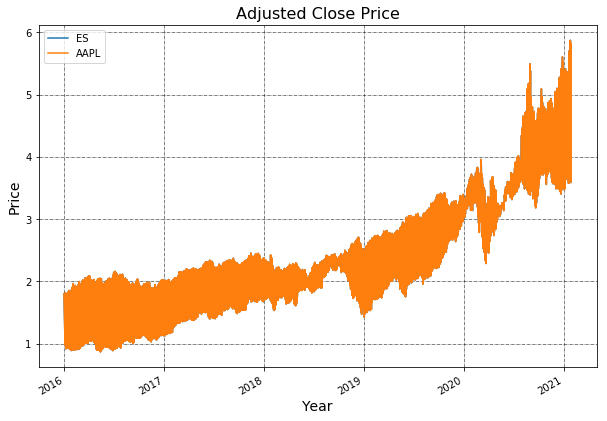

In [13]:
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k',  linestyle='-.', linewidth=0.5)
plt.show()

In [38]:
data.pct_change().sort_index(ascending=False).head(10)

,ES,AAPL
Dt,,
2021-01-29,-0.336920,-0.336920
2021-01-29,0.480368,0.480368
2021-01-28,-0.349770,-0.349770
2021-01-28,0.548515,0.548515
2021-01-27,-0.376813,-0.376813
2021-01-27,0.580376,0.580376
2021-01-26,-0.372101,-0.372101
2021-01-26,0.585558,0.585558
2021-01-25,0.635053,0.635053


In [11]:
df_change = df.drop(['OpenValue', 'HighValue', 'LowValue', 'CloseValue', 'Volume', 'LoadDt'], axis=1)

In [32]:
df_change['AdjClose'].pct_change().loc['2021-01-29']

Dt
2015-12-31         NaN
2015-12-31    0.800505
2016-01-04   -0.444125
2016-01-04    0.792274
2016-01-05   -0.456031
                ...   
2021-01-27   -0.376813
2021-01-28    0.548515
2021-01-28   -0.349770
2021-01-29    0.480368
2021-01-29   -0.336920
Name: AdjClose, Length: 2558, dtype: float64

In [ ]:
len(df_change.loc['2021-01-01':'2021-01-29'].index)

In [69]:
len(df_change.loc['2021-01-01':'2021-01-29'].groupby('Dt'))

19

In [12]:
df_change['Change'] = df_change.groupby('Stock').AdjClose.pct_change()
df_change['Change7'] = df_change.groupby('Stock').AdjClose.pct_change(7)
df_change['Change30'] = df_change.groupby('Stock').AdjClose.pct_change(30)
df_change['Change90'] = df_change.groupby('Stock').AdjClose.pct_change(90)
df_change['Change180'] = df_change.groupby('Stock').AdjClose.pct_change(180)
df_change['Change360'] = df_change.groupby('Stock').AdjClose.pct_change(360)

In [18]:
df_change['ActualYear'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-01-01':'2021-01-31'].groupby('Dt')))
df_change['ActualMonth'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-02-01':'2021-02-01'].groupby('Dt')))

In [19]:
df_change.loc['2021-01-29']

,Stock,AdjClose,Change,Change7,Change30,Change90,Change180,Change360,ActualYear,ActualMonth
Dt,,,,,,,,,,
2021-01-29,AAPL,131.960007,-0.037421,-0.00053,0.031905,0.200833,0.721775,1.586067,-0.005502,0.0
2021-01-29,ES,87.500000,-0.018398,-0.00137,0.016861,0.129078,0.165532,0.138789,0.011444,0.0


In [20]:
pip install pandasgui

ERROR: spyder 4.1.3 has requirement pyqt5<5.13; python_version >= "3", but you'll have pyqt5 5.15.2 which is incompatible.
ERROR: spyder 4.1.3 has requirement pyqtwebengine<5.13; python_version >= "3", but you'll have pyqtwebengine 5.15.2 which is incompatible.


  Created wheel for pandasgui: filename=pandasgui-0.2.7-py3-none-any.whl size=6931296 sha256=4312843445fbcd2bf312ae334f726f8efbf716d6ee1a0140e1408cd2f74cbe54
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\06\79\30\fed1fa2d679573ad9e85a5ede31538f6a7b78dcf8ad4ab099e
Successfully built pandasgui


In [21]:
from pandasgui import show
gui = show(df_change)

In [1]:
pip install bamboolib


  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13055 sha256=0ba35f8032726f728fe4527d90e88f34769cebcbf1beb2478b55336b3eff9c2a
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\d2\3c\58\2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761262 sha256=a5fa730a805cb98fa36971f0a22b4da4ddb618c9c3cad0aa0a8e80299fbfd179
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\53\87\cb\c63a58774627471976061afb5b8657b76d2268c1e76e980586
Successfully built ppscore qgrid
  Attempting uninstall: attrs
    Found existing installation: attrs 19.3.0
    Uninstalling attrs-19.3.0:
      Successfully uninstalled attrs-19.3.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: plotly
    Found existing installation: plotly 4.7.1
    Uninstalling plo

In [ ]:
jupyter nbextension enable --py qgrid --sys-prefix
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension install --py bamboolib --sys-prefix
jupyter nbextension enable --py bamboolib --sys-prefix

In [1]:
import bamboolib as bam
import pandas as pd
data = pd.read_csv(bam.titanic_csv)
bam.show(data)

In [ ]:
https://medium.com/nuances-of-programming/bamboolib-%D0%B8%D0%B7%D1%83%D1%87%D0%B0%D0%B9%D1%82%D0%B5-%D0%B8-%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B9%D1%82%D0%B5-pandas-%D0%B1%D0%B5%D0%B7-%D0%BD%D0%B0%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D1%8F-%D0%BA%D0%BE%D0%B4%D0%B0-1ed405f6c92d
https://towardsdatascience.com/how-to-create-an-interactive-dropdown-in-jupyter-322277f58a68    